# Machine Learning Project - Rainfall prediction

## 1. Exploration the data

As usual, we load some important and useful libraries for data loading and data visualization

In [1]:
library(ggplot2)
library(tidyr)
library(gridExtra)

Warning message:
"package 'gridExtra' was built under R version 4.0.5"


We load the dataset as a dataframe

In [2]:
rain = read.delim("rain_project.txt", sep = " ")

In [3]:
summary(rain)

      Id                date                 ff               t        
 Length:688         Length:688         Min.   : 1.158   Min.   :269.5  
 Class :character   Class :character   1st Qu.: 2.870   1st Qu.:279.9  
 Mode  :character   Mode  :character   Median : 3.859   Median :283.2  
                                       Mean   : 4.082   Mean   :283.7  
                                       3rd Qu.: 4.970   3rd Qu.:287.6  
                                       Max.   :12.500   Max.   :299.5  
       td              hu               dd             precip      
 Min.   :267.1   Min.   : 46.75   Min.   : 32.92   Min.   : 0.000  
 1st Qu.:277.6   1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000  
 Median :281.2   Median : 86.40   Median :222.81   Median : 0.400  
 Mean   :281.1   Mean   : 85.56   Mean   :206.58   Mean   : 2.384  
 3rd Qu.:284.7   3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600  
 Max.   :291.1   Max.   :100.00   Max.   :343.04   Max.   :34.500  
    ws_arome        

In [4]:
head(rain)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


In [5]:
rain[, "Id"] <- as.factor(rain[, "Id"])
rain[, "date"] <- as.factor(rain[, "date"])
rain[, "rain_class"] <- as.factor(rain[, "rain_class"])

## Elementary Explorations

In [6]:
names(rain)

[1] "Id"          "date"        "ff"          "t"           "td"         
 [6] "hu"          "dd"          "precip"      "ws_arome"    "p3031_arome"
[11] "u10_arome"   "v10_arome"   "t2m_arome"   "d2m_arome"   "r_arome"    
[16] "tp_arome"    "msl_arome"   "rain"        "rain_class"

In [7]:
# Numerical variables
num_var = names(rain)[-c(1,2,19)]
qual_var = names(rain)[c(1,2,19)]

In [8]:
num_var

[1] "ff"          "t"           "td"          "hu"          "dd"         
 [6] "precip"      "ws_arome"    "p3031_arome" "u10_arome"   "v10_arome"  
[11] "t2m_arome"   "d2m_arome"   "r_arome"     "tp_arome"    "msl_arome"  
[16] "rain"

### Histogram to see the distributions of variables

In [9]:
ColHist = function(data, col_name)
{
    hist =  ggplot(data = data, aes_string(x = col_name)) + geom_histogram(binwidth=.2, color="black", fill="white")
    return(hist)
}

In [13]:
lapply(list(1,2,3), function(x){x*2})

[[1]]
[1] 2

[[2]]
[1] 4

[[3]]
[1] 6

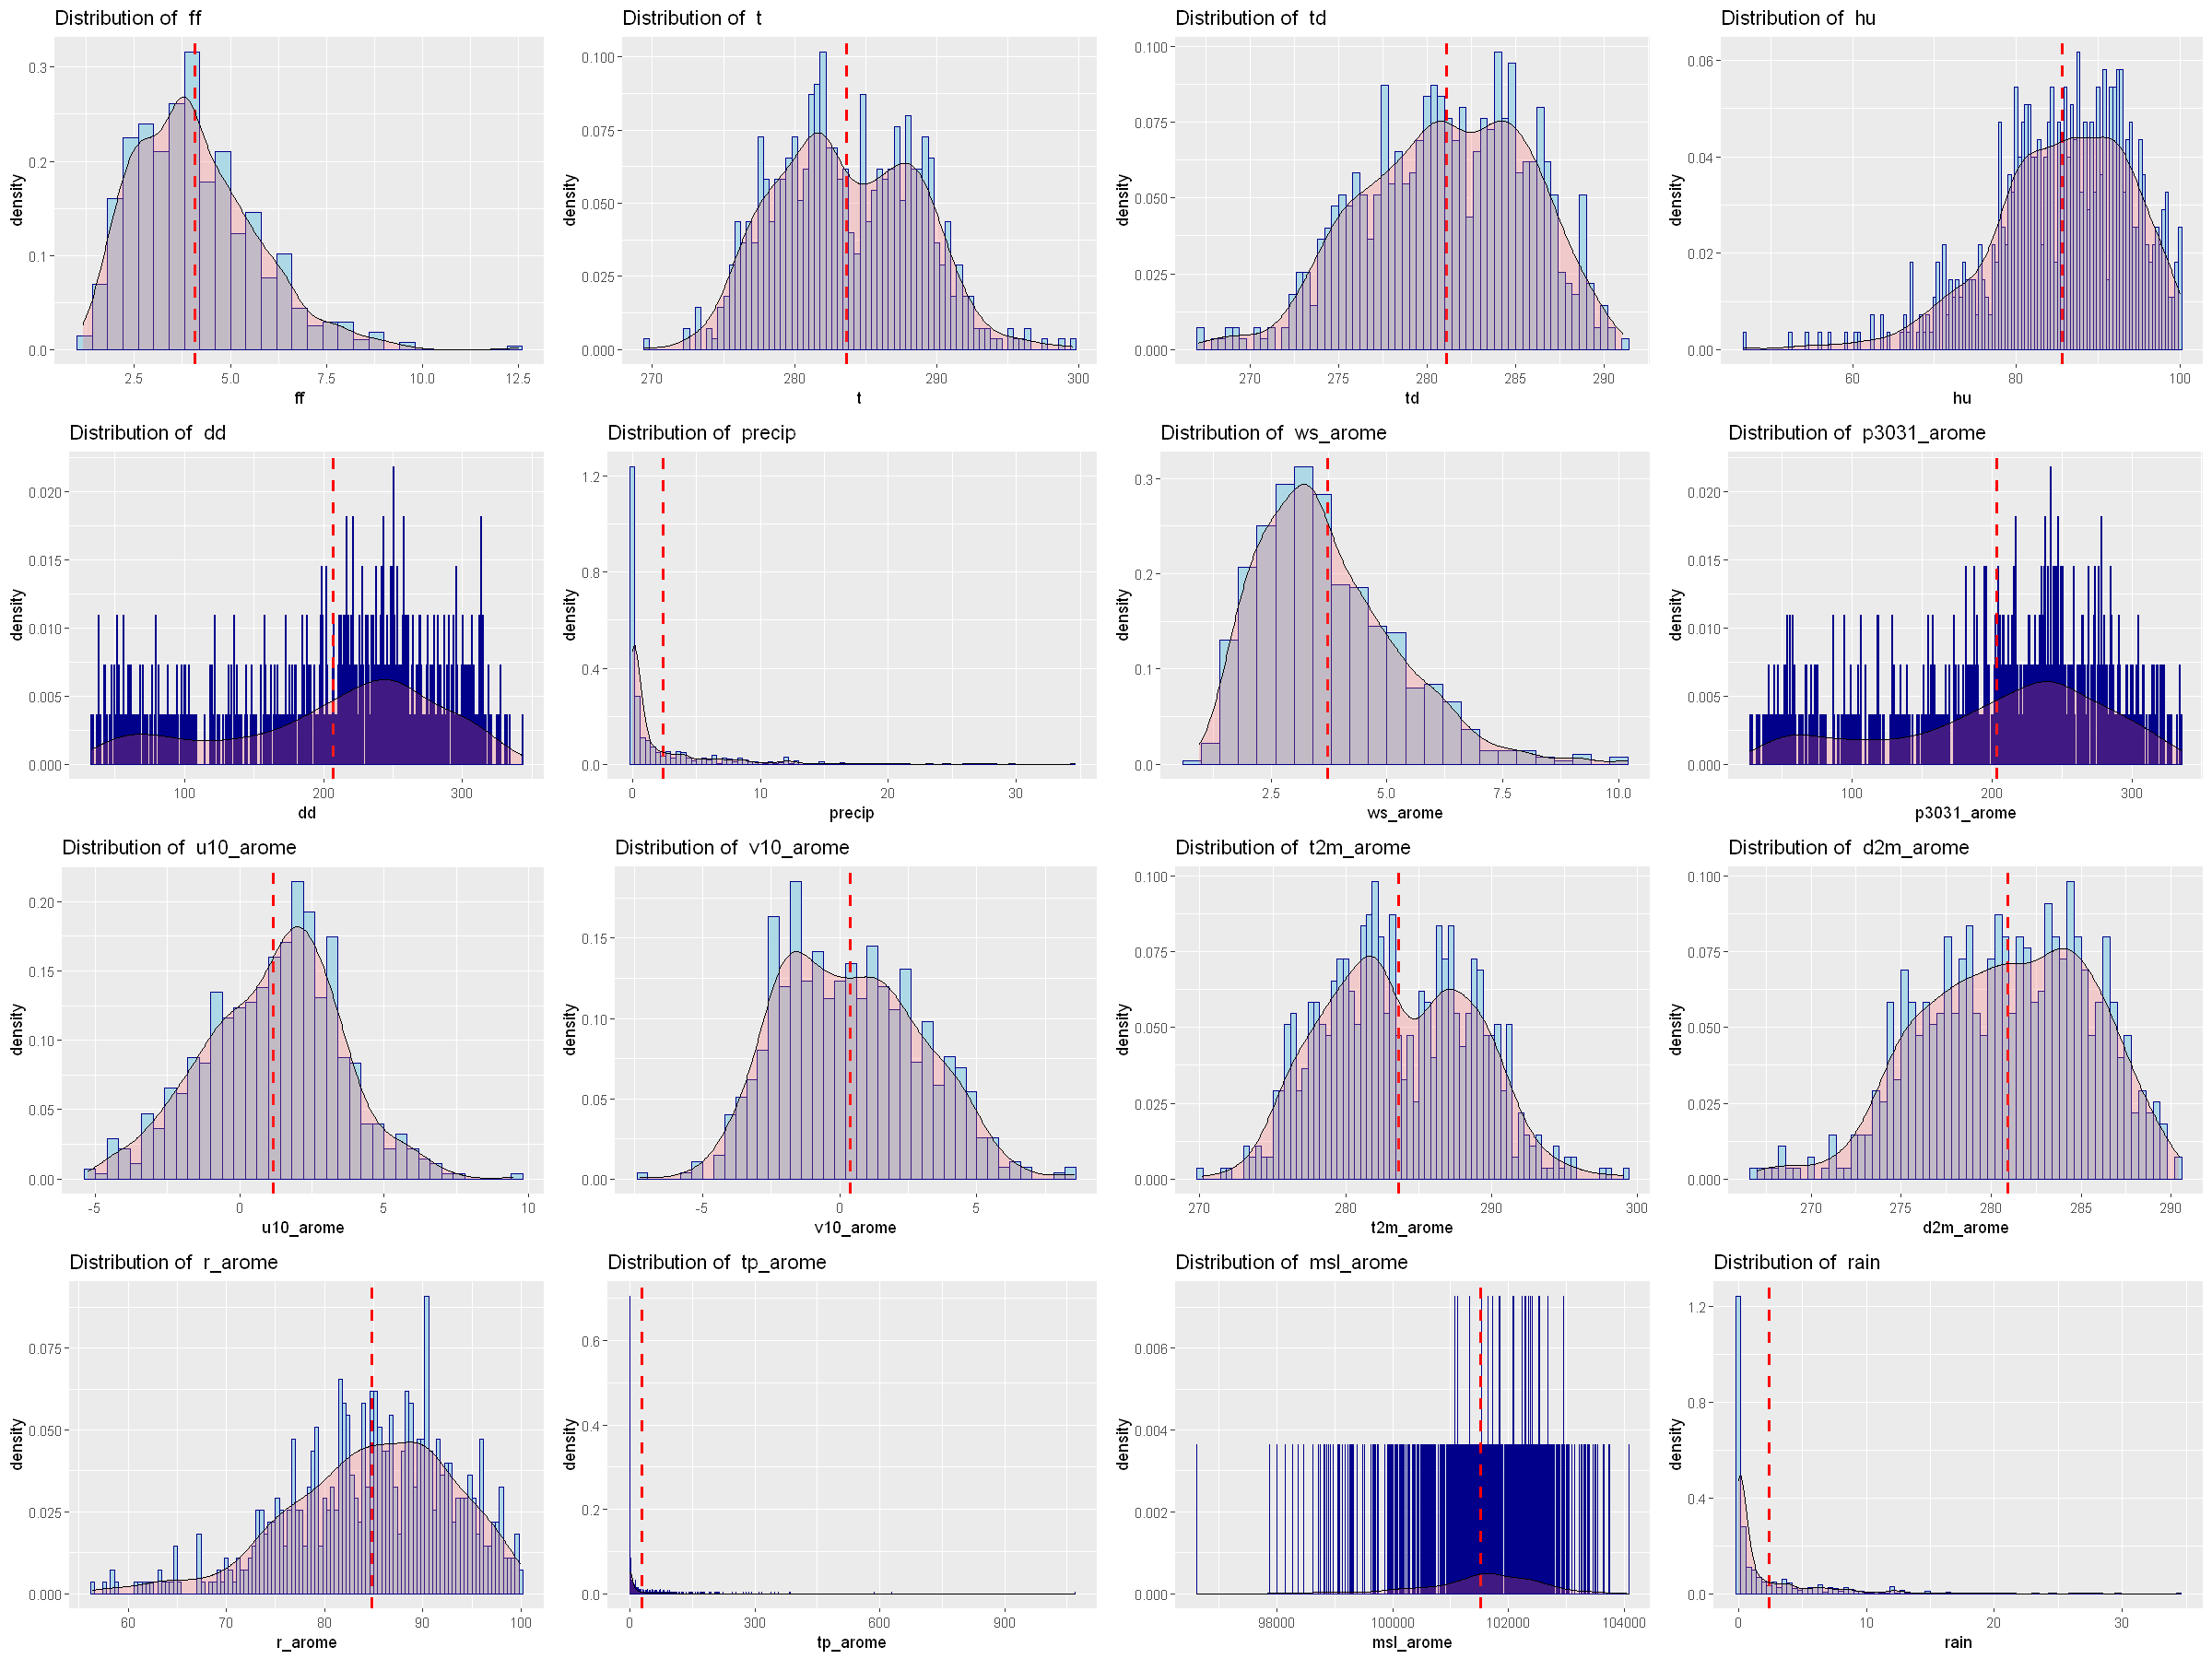

In [23]:
# Use lapply 

my_plots_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), binwidth = 0.4, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = my_plots_list, ncol = 4)

From these histograms, we can remark that the distribution of some variables are not summetric. So we propose here some elementary transformations to make some distributions more symmetric and more "gaussian" 

In [ ]:
rain[,'ff'] = sqrt(rain[,'ff'])


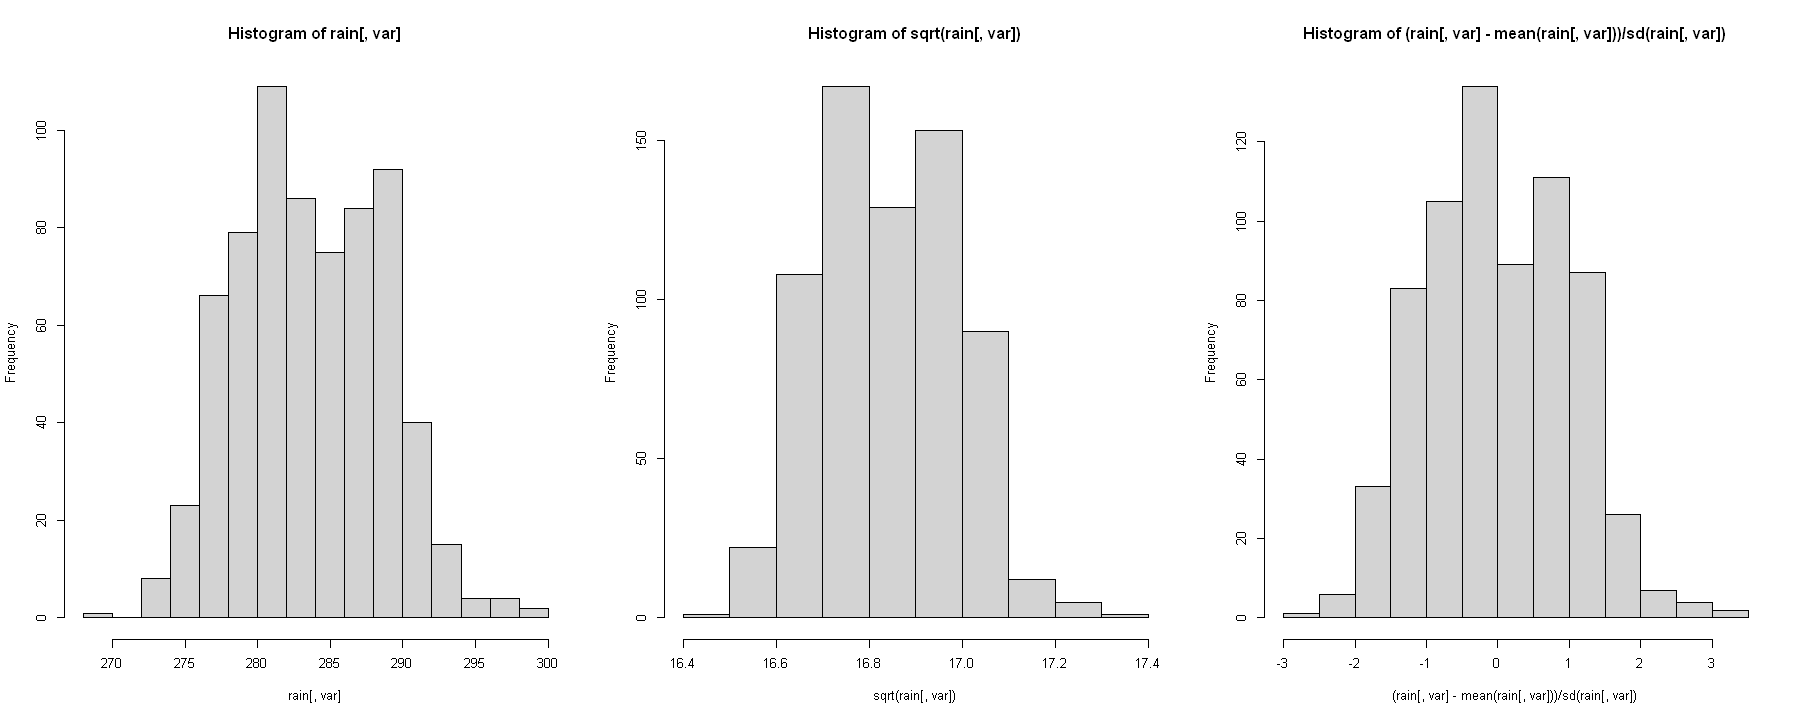

In [33]:
par(mfrow = c(1, 3))
options(repr.plot.width = 15, repr.plot.height = 6)
var = 't'
hist(rain[,var])
hist(sqrt(rain[,var]))
hist((rain[,var] - mean(rain[,var]))/sd(rain[,var]))

In [17]:
rain[, "precip_log"] <- log(log(rain[, "precip"]))
rain[, "tp_arome_log"] <- log(rain[, "tp_arome"])


Warning message in log(log(rain[, "precip"])):
"NaNs produced"


### Data normalization

We will normalize the data to have zero mean and unit standard deviation for each varariable

In [38]:
rain_scaled = rain
rain_scaled[num_var] = scale(rain_scaled[num_var], center = TRUE, scale = TRUE)   

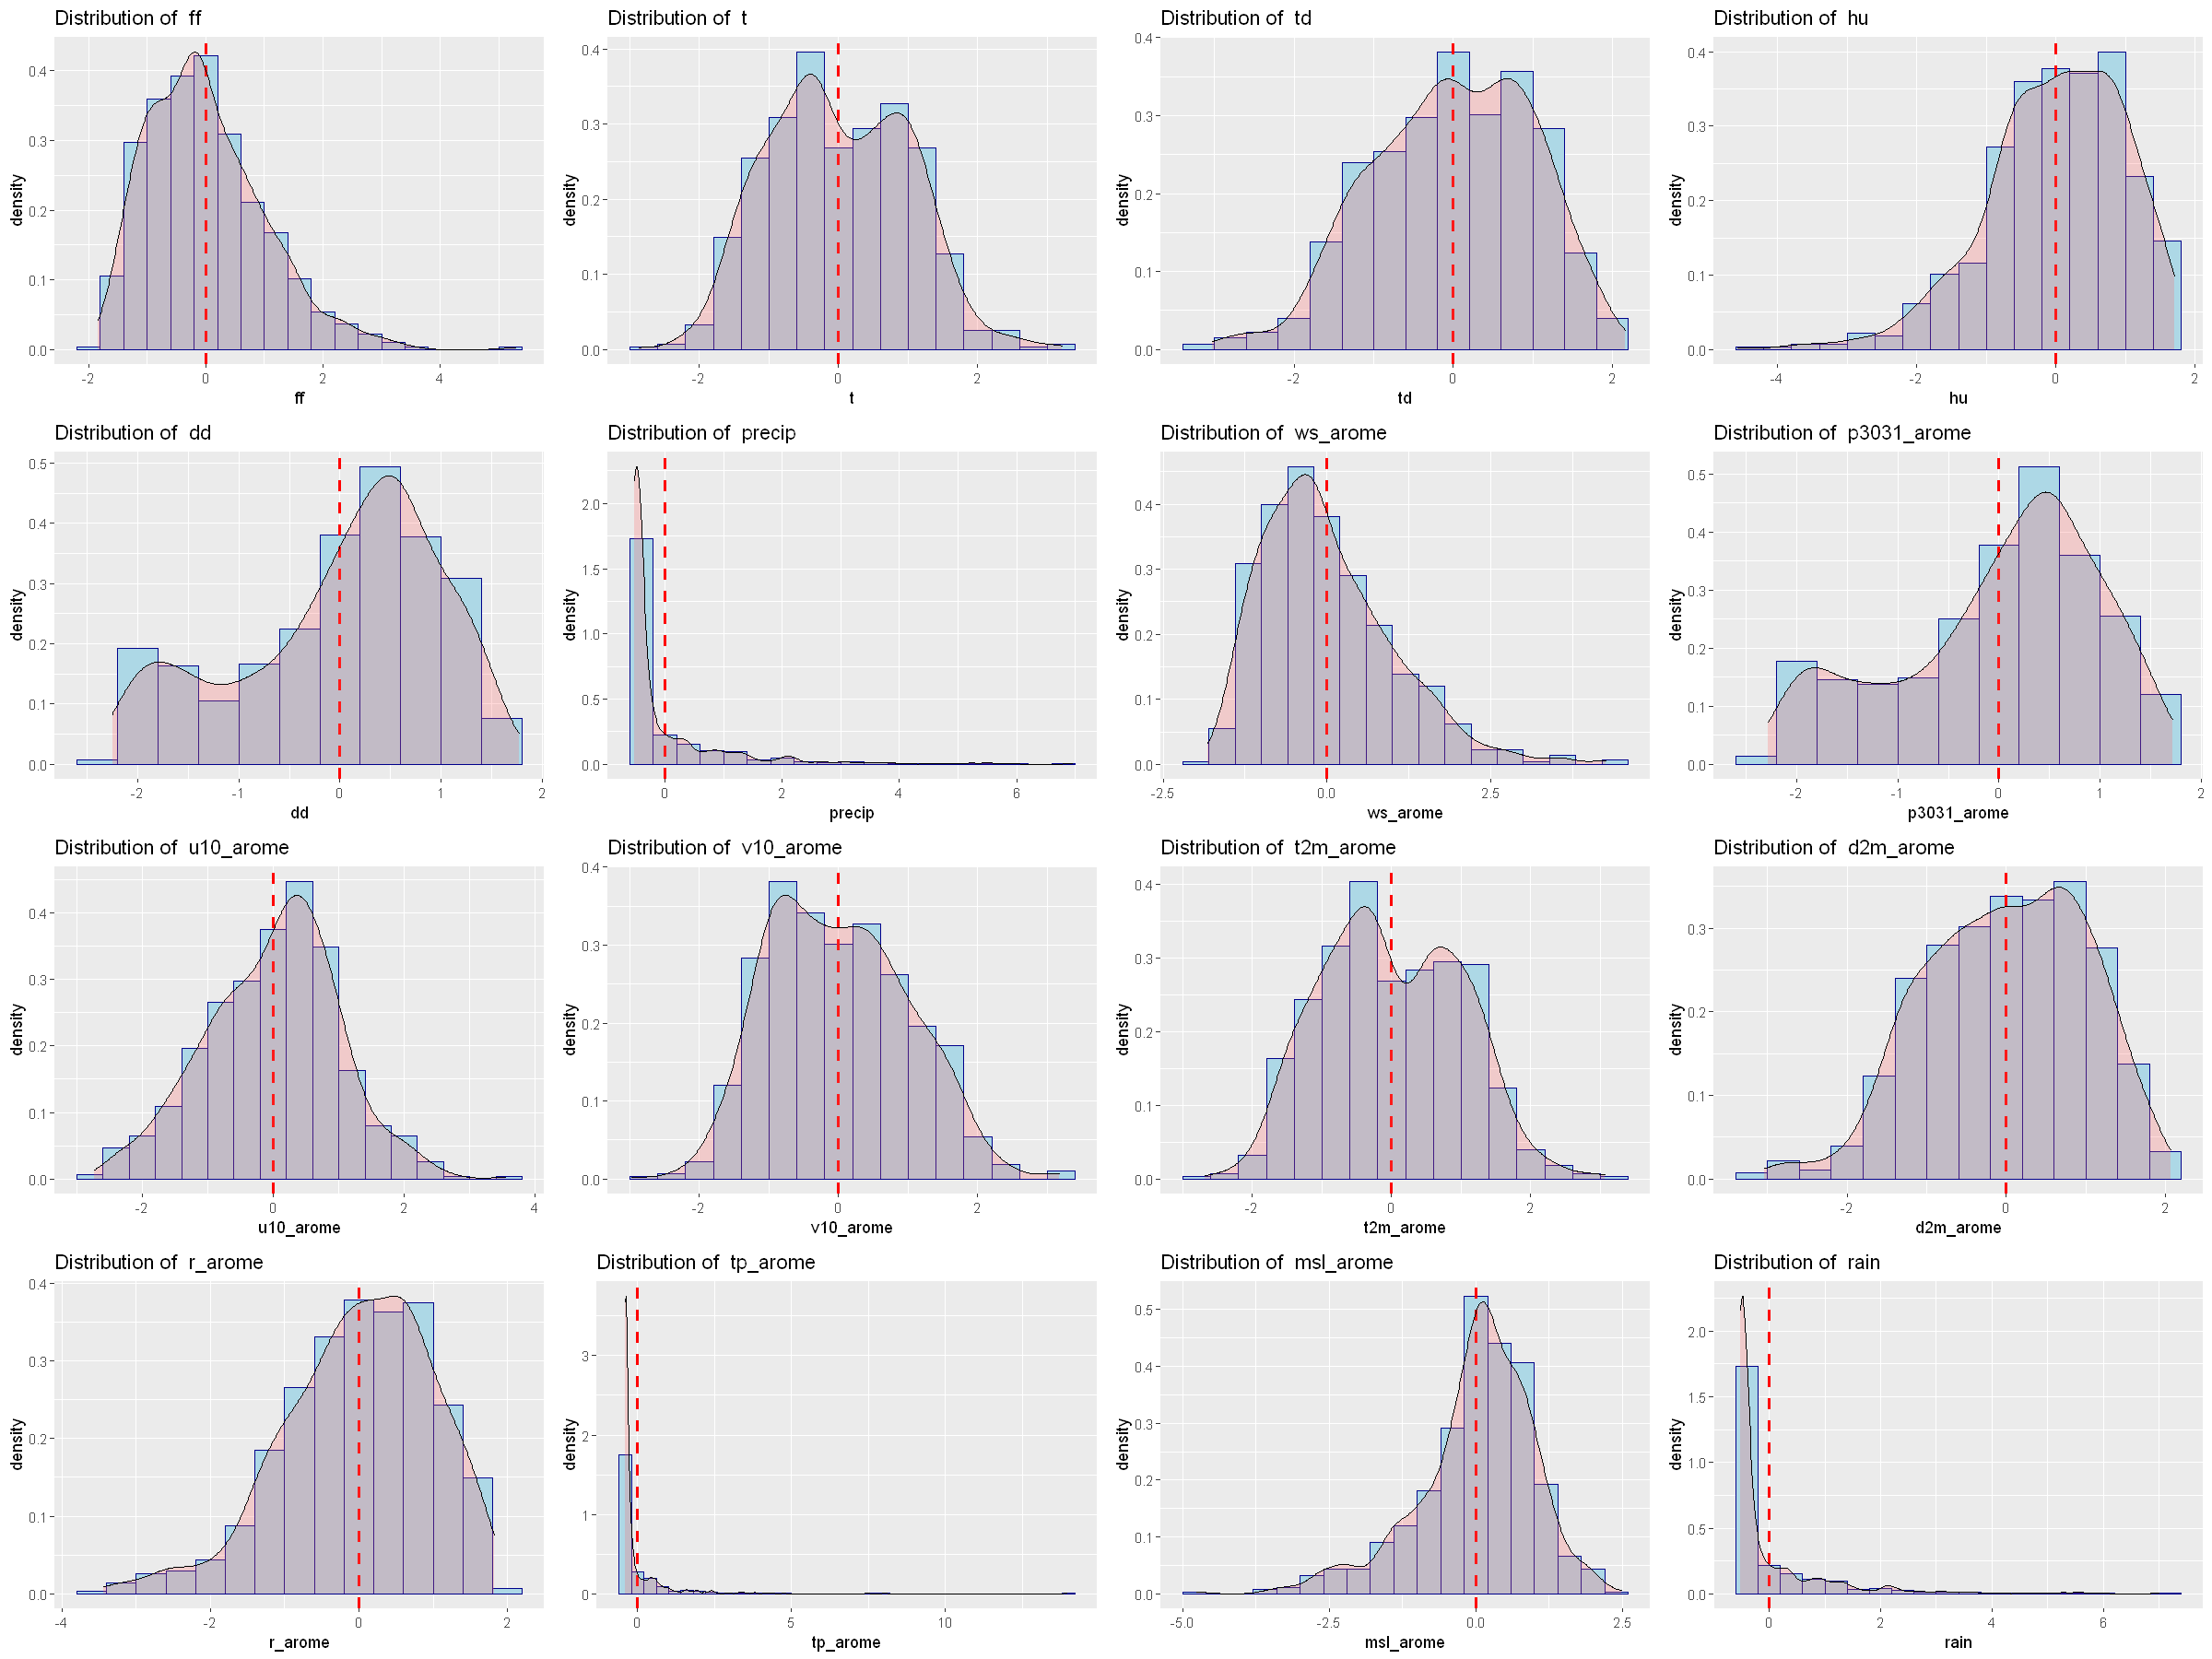

In [39]:
hist_list_scaled <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain_scaled[, each_variable])[[1]]
  ggplot(data = rain_scaled, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), binwidth = 0.4, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = hist_list_scaled, ncol = 4)

### Deal with outliers

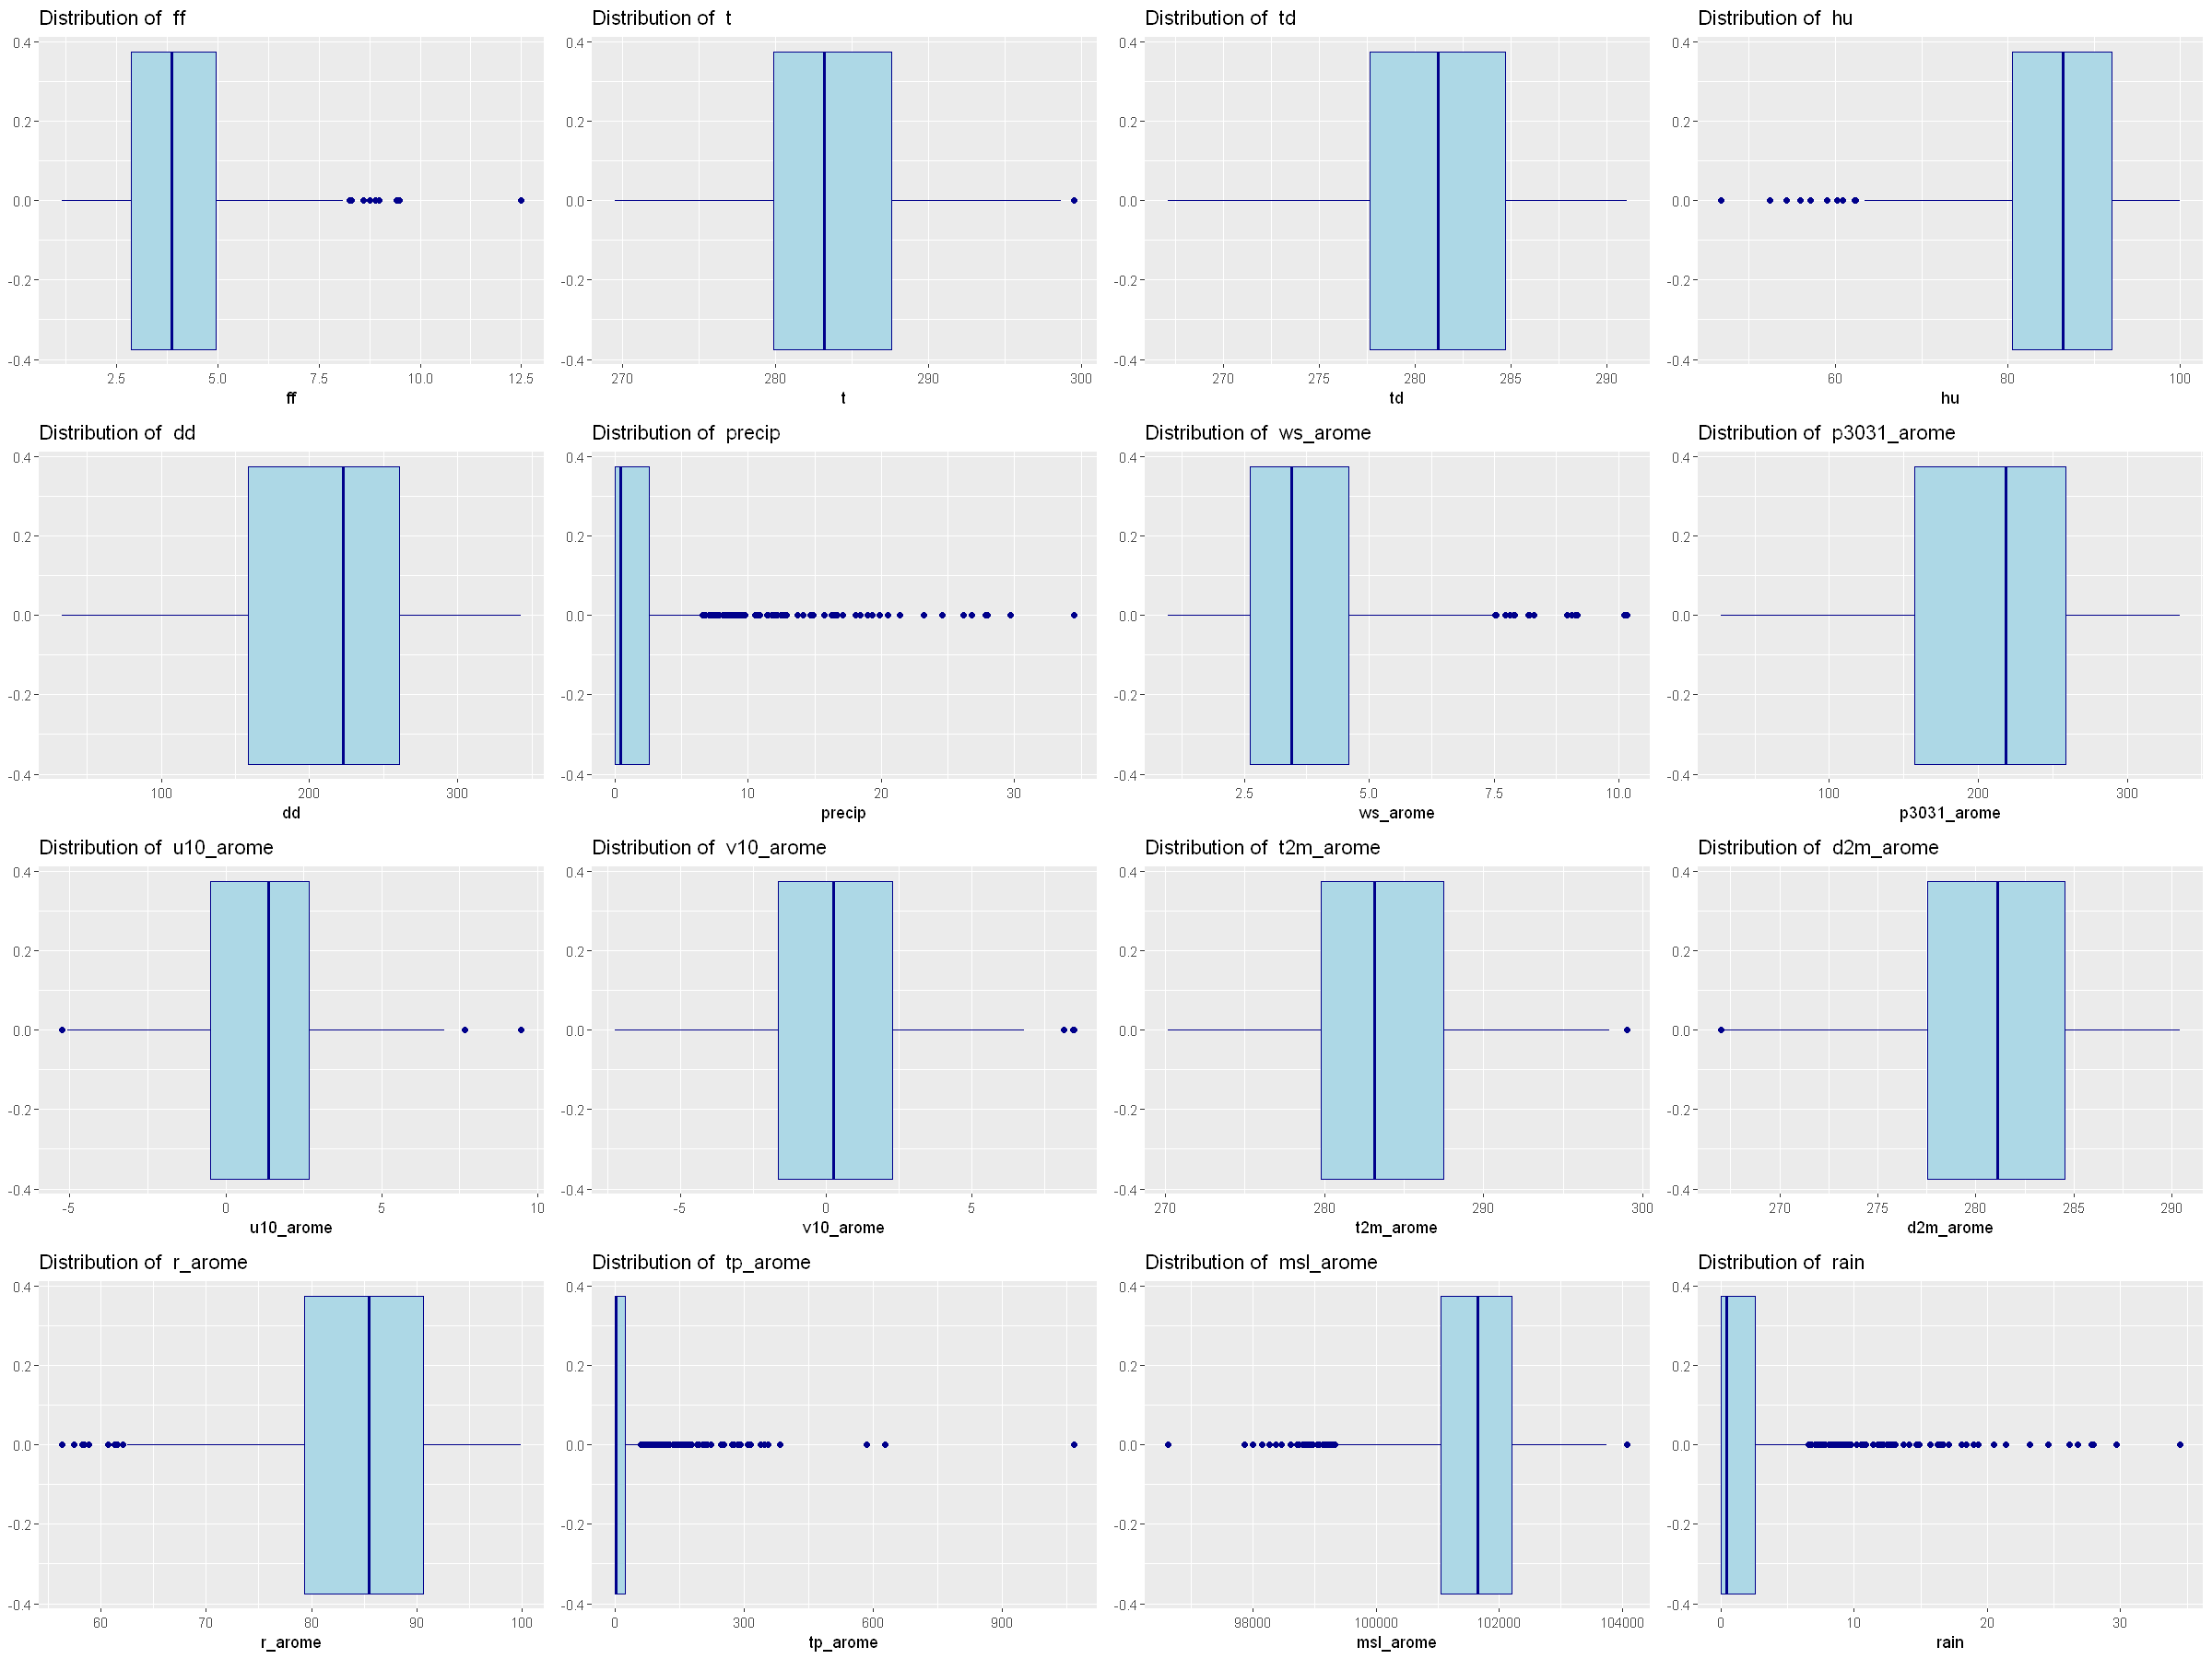

In [46]:
box_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_boxplot(color = "darkblue", fill="lightblue") +
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = box_list, ncol = 4)